In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
#Load the Dataset
data = pd.read_csv('Mall_Customers.csv')

In [9]:
#Inspet the dataset
print("Dataset Shape: ",data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows: ",data.duplicated().sum())
print("\nData Types: \n",data.dtypes)
print("\nSummary Statistics:\n",data.describe())

Dataset Shape:  (200, 5)

Missing Values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Duplicate Rows:  0

Data Types: 
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [11]:
#Selecting relevant features for clustering
data_selected = data[['Age','Annual_Income_(k$)','Spending_Score']]

In [13]:
#Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected) 

In [15]:
#Ensure 'data_scaled' is a NumPy array
print("Shape of scaled data: ", data_scaled.shape)

Shape of scaled data:  (200, 3)


In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [19]:
import warnings
warnings.filterwarnings("ignore", message = "KMeans is known to have a memory leak")

In [21]:
#Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

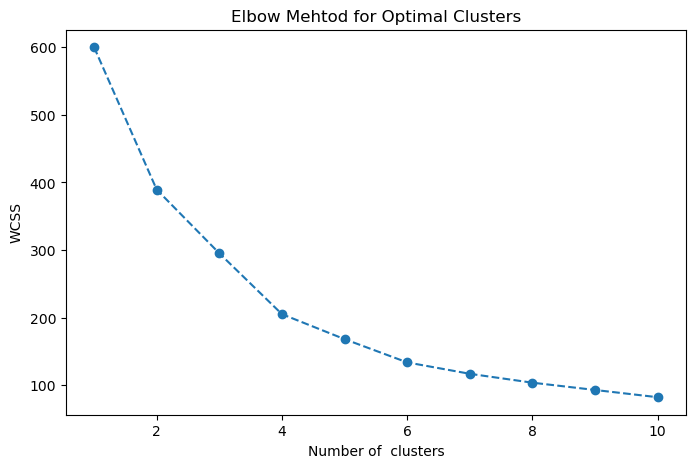

In [23]:
#Plot the WCSS values to visualize the Elbow Method
plt.figure(figsize = (8,5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Mehtod for Optimal Clusters')
plt.xlabel('Number of  clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#Silhouette Score Evaluation
for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}')

For n_clusters = 2, the silhouette score is 0.335
For n_clusters = 3, the silhouette score is 0.358
For n_clusters = 4, the silhouette score is 0.404
For n_clusters = 5, the silhouette score is 0.408
For n_clusters = 6, the silhouette score is 0.431
For n_clusters = 7, the silhouette score is 0.410
For n_clusters = 8, the silhouette score is 0.367
For n_clusters = 9, the silhouette score is 0.374
For n_clusters = 10, the silhouette score is 0.362


In [27]:
#Apply K-Means Clustering (Choose Optimal Clusters from Elbow Method or Silhouette)
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster_labels = kmeans.fit_predict(data_scaled)
data['Cluster'] = cluster_labels


In [29]:
#Visualization: PCA for 2D visualization
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:,0]
data['PCA2'] = data_pca[:,1]

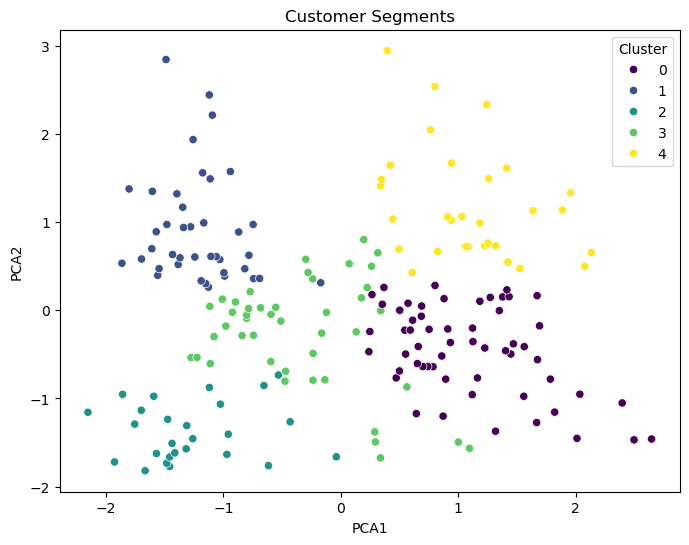

In [31]:
#Scatter plot of clusters
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', data = data, palette = 'viridis')
plt.title('Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title = 'Cluster')
plt.show()

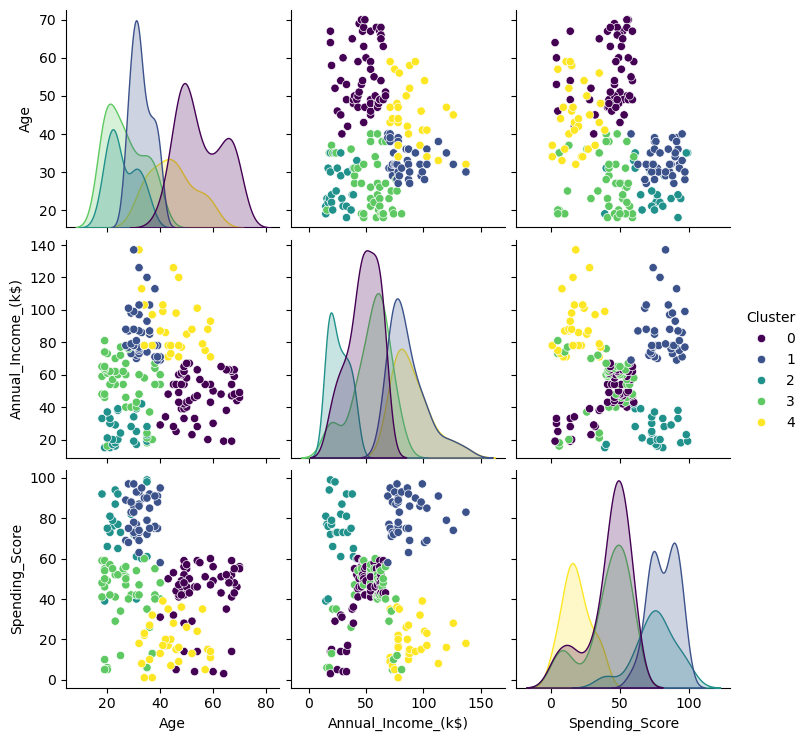

In [35]:
#Pair Plot for features
sns.pairplot(data, vars = ['Age', 'Annual_Income_(k$)', 'Spending_Score'], hue = 'Cluster', palette = 'viridis')
plt.show()

In [37]:
#Deliverables - Save clustered dataset
data.to_csv('Clustered_Customers.csv',index=False)

In [39]:
#Recommendations
print("\nRecommendations: ")
print("1. Target high-spending customers in Cluster X with loyalty programs.")
print("2. Offer discounts to customers in Cluster Y to increase spending.")
print("3. Tailor promotions for different age groups in respective clusters.")


Recommendations: 
1. Target high-spending customers in Cluster X with loyalty programs.
2. Offer discounts to customers in Cluster Y to increase spending.
3. Tailor promotions for different age groups in respective clusters.
